In [ ]:


img = cv2.imread('coins.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import os.path
import random

from PIL import Image, ImageFilter

%run ../../../Super-Diatomee-Classifier/artifical_dataset/utils.ipynb



ImportError: No module named 'PIL'

In [54]:
DATASET_PATH = os.path.abspath("../../../Super-Diatomee-Classifier/artifical_dataset/data/ra")

In [80]:
#import d'images
images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f))]

for file in images:
    img_path = join(DATASET_PATH, file)
    #showImg(plt.imread(img_path))
    img = cv2.imread(img_path)
    
    #prendre les marqeurs (les bords de l'image pour l'exterieur et le milieu de l'image comme l'interieur)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



In [82]:
img = cv2.imread(join(DATASET_PATH,'Ra_UULN_8986.png')
print(img)

SyntaxError: invalid syntax (<ipython-input-82-4a7d26919b7d>, line 2)

In [65]:
images = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f))]
img_path = random.choice(images)

img_path = join(DATASET_PATH, img_path)

src.create(rows, cols, CV_8UC1);
img1 = imread(img_path, CV_8UC1);

#img1 = cv2.imread(img_path)
#print(img1.shape)
#img,s = perdecomp(img1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray,s = perdecomp(gray)
showImg(gray)
retval2,threshold2 = cv2.threshold(gray,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
edges = cv2.Canny(th,100,200)
print(gray.shape)


'''cv2.imshow('original',gray)
cv2.imshow('threshold',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()'''


NameError: name 'src' is not defined

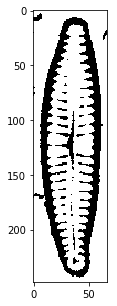

37


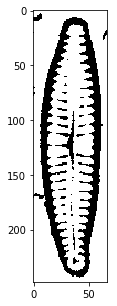

In [63]:
showImg(threshold2)
print(np.argmax(np.sum(edges,axis=0)))
showImg(threshold2)

In [47]:
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(threshold2,cv2.MORPH_OPEN,kernel, iterations = 3)
closing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 3)


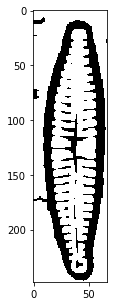

In [48]:
showImg(opening)

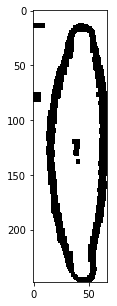

In [49]:
showImg(closing)

In [55]:
def perdecomp(u):
    ny, nx = u.shape 
    X = np.arange(nx).reshape((1,nx))
    Y = np.arange(ny).reshape((ny,1))
    v = np.zeros((ny,nx))
    v[0,X] = u[0,X] - u[-1,X]
    v[-1,X] = -v[0,X]
    v[Y,0] = v[Y,0] + u[Y,0] - u[Y,-1]
    v[Y,-1] = v[Y,-1] - u[Y,0] + u[Y,-1]
    fx = np.cos(2*np.pi*X/nx)
    fy = np.cos(2*np.pi*Y.T/ny)
    fx[0,0] = 0.   # avoid division by 0 in the line below
    s = np.real(np.fft.ifft2(np.fft.fft2(v)*0.5/(2.-np.repeat(fx, ny, axis = 0)-np.repeat(fy.T, nx, axis = 1))))
    p = u-s
    return p, s